In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
scaler = StandardScaler()
import pandas_profiling
from datetime import datetime
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score
from sklearn.model_selection import StratifiedKFold
from imblearn.metrics import geometric_mean_score as geo
from imblearn.metrics import make_index_balanced_accuracy as iba
from sklearn.metrics import roc_curve, auc
from imblearn.metrics import geometric_mean_score, make_index_balanced_accuracy, classification_report_imbalanced
from pycaret.classification import *
import sqlite3
from sqlite3 import Error
import datetime as dt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split as tts

In [2]:
df = pd.read_csv('air-traffic-passenger-statistics.csv')

In [4]:
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

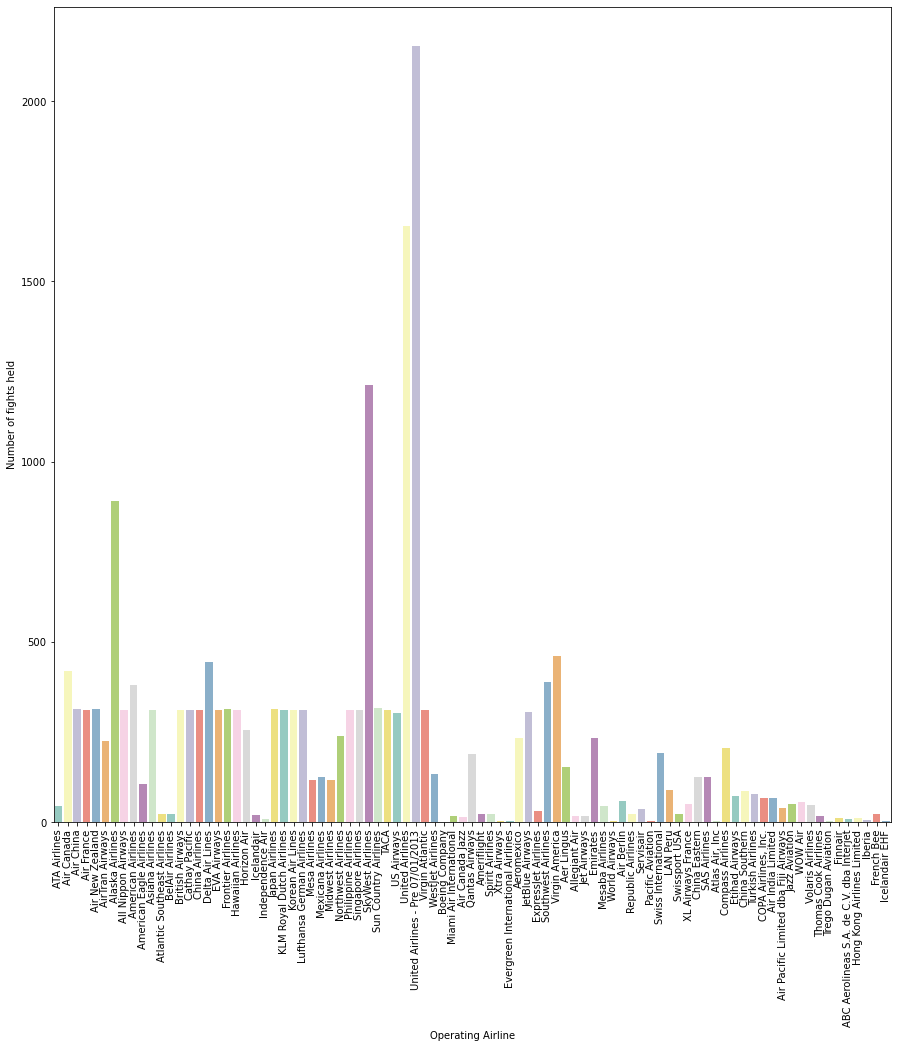

In [5]:
plt.figure(figsize = (15,15))
sns.countplot(x = "Operating Airline", palette = "Set3",data = df)
plt.xticks(rotation = 90)
plt.ylabel("Number of fights held")
plt.show()

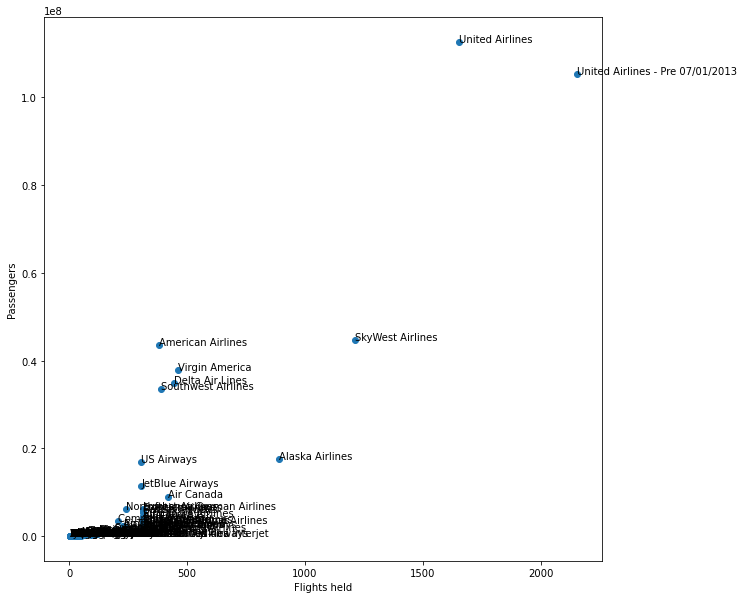

In [14]:
airline_count = df["Operating Airline"].value_counts()
airline_count.sort_index(inplace=True)
passenger_count = df.groupby("Operating Airline").sum()["Passenger Count"]
passenger_count.sort_index(inplace=True)
from sklearn.preprocessing import scale
x = airline_count.values
y = passenger_count.values
plt.figure(figsize = (10,10))
plt.scatter(x, y)
plt.xlabel("Flights held")
plt.ylabel("Passengers")
for i, txt in enumerate(airline_count.index.values):
    a = plt.gca()
    plt.annotate(txt, (x[i], y[i]))
plt.show()

IndexError: index 87 is out of bounds for axis 0 with size 87

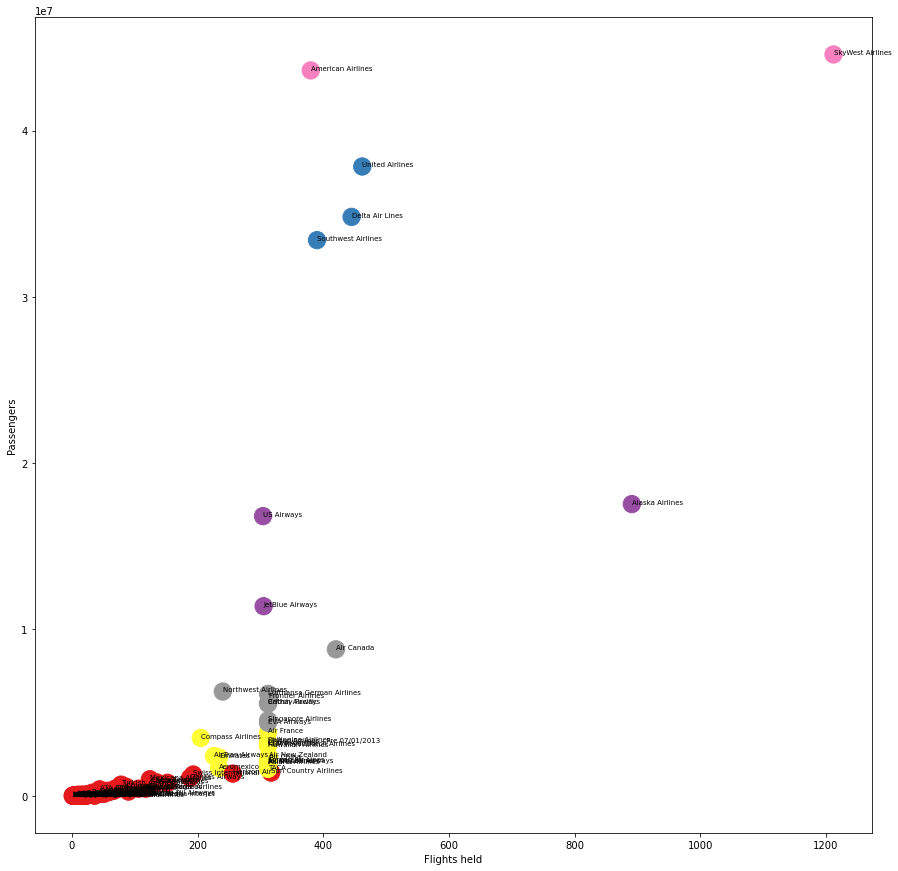

In [15]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.figure(figsize = (15,15))
plt.xlabel("Flights held")
plt.ylabel("Passengers")
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=300, cmap='Set1')
for i, txt in enumerate(airline_count.index.values):
    plt.annotate(txt, (X[i,0], X[i,1]), size = 7)
plt.show()

In [7]:
df_1 = airline_count + passenger_count
df_1.sort_values(ascending = False, inplace = True)
outliers = df_1.head(2).index.values
airline_count = airline_count.drop(outliers)
airline_count.sort_index(inplace=True)
passenger_count = passenger_count.drop(outliers)
passenger_count.sort_index(inplace = True)
x = airline_count.values
y = passenger_count.values

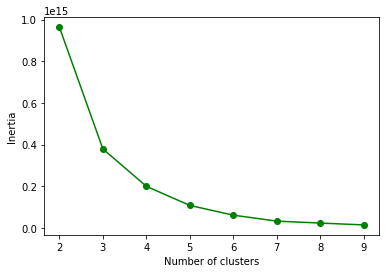

In [8]:
from sklearn.cluster import KMeans
X = np.array(list(zip(x,y)))
inertias = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
plt.plot(range(2,10), inertias, "o-g")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()
